In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, r2_score
import plotly.express as px
import math
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Data2.csv")
df.head()

,x,y
0,0.1,57.649519
1,0.2,47.408700
2,0.3,69.469021
3,0.4,37.550856
4,0.5,78.606853


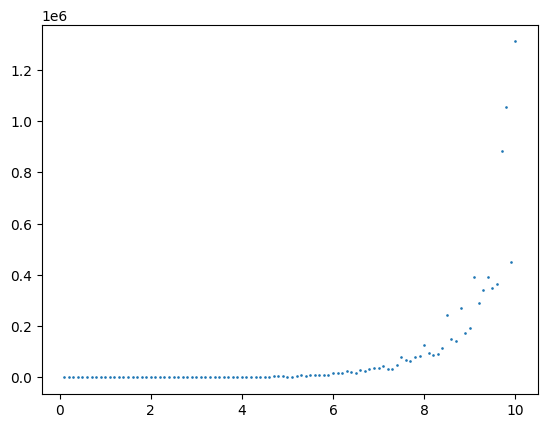

In [ ]:
x_list = [float(item) for item in list(df['x'])]
y_value = [float(item) for item in list(df['y'])]

plt.scatter(x_list, y_value, s=0.8)
plt.show()

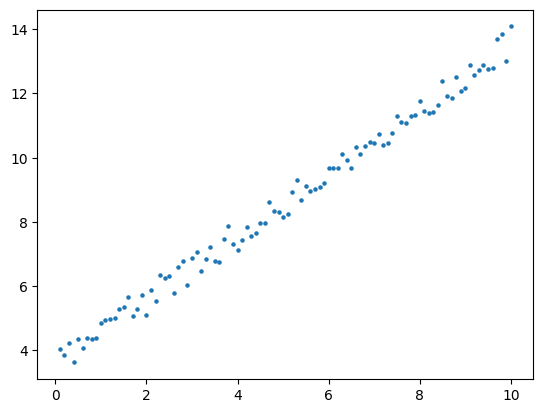

In [ ]:
# Log made all the exponential into linear.
y_list =[np.log(k) for k in y_value]

plt.scatter(x_list, y_list, s=5)
plt.show()

In [ ]:
# Now it is the turn of the function for slope and intercept
def minimize(x_list, y_list):
  '''
  Returns the value of slope(m) and intercept(c)

  Parameter x_list: List of values of inputs
  Precondition: This list must contain int or float values

  Parameter y_list: List of valus of output of the experiment
  Precondition: This list must contain int or float values

  Parameter n: It is the number of experiment
  Precondition: It must be a positive integer
  '''
  assert type(x_list) == list,'Please give inputs in a list'
  assert type(y_list) == list,'Please provide the outputs in a list'

  # Accumulators...
  n = len(x_list)
  xy = 0
  x = 0
  y = 0
  x_square = 0

  for i in range(n):
    y += y_list[i]
    x += x_list[i]
    x_square += x_list[i] ** 2
    xy += x_list[i] * y_list[i]
  xyBar = xy / n
  xBar = x / n
  yBar = y / n
  xSquareBar = x_square / n
  xBarSquare = xBar ** 2
  # Calculating values of m and c using above terms in above mentoned formula for m and c.
  m_new = (xyBar - xBar * yBar) / (xSquareBar - xBarSquare)
  c_new = yBar - m_new * xBar

  return (m_new, c_new)

In [ ]:
observed_y = y_list

y_analytical = []
new_values = minimize(x_list, observed_y)
gama = new_values[0]
beta = math.exp(new_values[1])
print(gama, beta)
for i in range(len(df)):
    y_analytical.append(beta * (math.exp(gama * x_list[i])))

0.9729974518460563 39.73063951776823


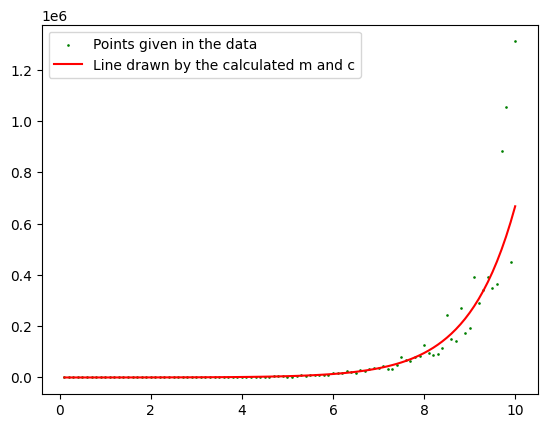

In [ ]:
# Let's play with the graph
plt.scatter(x_list, y_value, label = 'Points given in the data', color='green', s = 0.8)
plt.plot(x_list, y_analytical, label = 'Line drawn by the calculated m and c', color = 'red')
plt.legend()
plt.show()

In [ ]:
x_array = np.array(x_list).reshape(-1, 1)
y_array = np.array(y_list).reshape(-1, 1)

y_pred_array_myCode = []
for i in range(100):
  y = np.log(beta) + gama * x_list[i]

  y_pred_array_myCode.append(y)

# y_pred_array_myCode = np.array(y_analytical).reshape(-1, 1)

In [ ]:
mae = mean_absolute_error(y_true=y_array,y_pred=y_pred_array_myCode)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_array,y_pred=y_pred_array_myCode) #default=True
rmse = mean_squared_error(y_true=y_array,y_pred=y_pred_array_myCode,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.234988352890257
MSE: 0.07643342704351969
RMSE: 0.2764659600086775


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#Using linear Regression which is build by SkLearn.
regr = LinearRegression()

x_array = np.array(x_list).reshape(-1, 1)
y_array = np.array(y_list).reshape(-1, 1)

regr.fit(x_array,y_array)
print("beta: ", regr.coef_)
# print("Intercept: ",regr.intercept_)
alpha = np.exp(regr.intercept_)
print("alpha: ", alpha)

beta:  [[0.97299745]]
alpha:  [39.73063952]


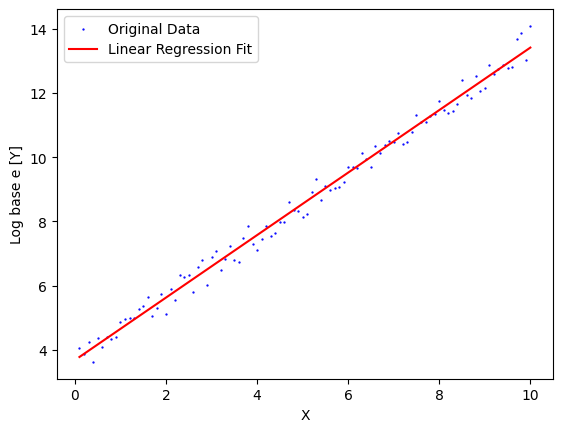

In [ ]:
#Now predicting the value of every data.
y_pred_array = regr.predict(x_array)

y_pred_list = list(y_pred_array.reshape(1,-1)[0])

plt.scatter(x_list, y_list, s=0.4, color='blue', label='Original Data')
plt.plot(x_list, y_pred_list, color='red', label='Linear Regression Fit')

# plt.tick_params(left = False, bottom = False)
plt.xlabel('X')
plt.ylabel('Log base e [Y]')
plt.legend()
plt.show()

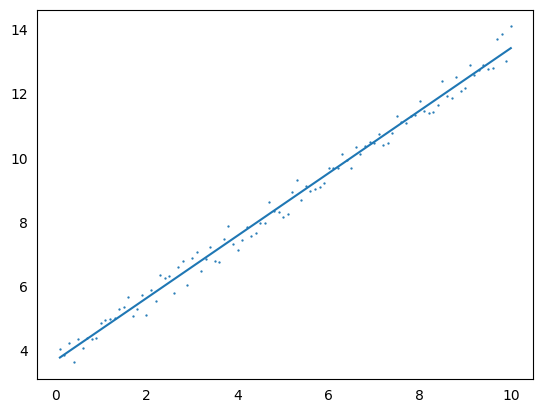

In [ ]:
y_pred_list = list(y_pred_array.reshape(1,-1)[0])

plt.scatter(x_list, y_list,s=0.4)
plt.plot(x_list, y_pred_list)
plt.tick_params(left = False, bottom = False)
plt.show()


In [ ]:
mae = mean_absolute_error(y_true=y_array,y_pred=y_pred_array)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_array,y_pred=y_pred_array) #default=True
rmse = mean_squared_error(y_true=y_array,y_pred=y_pred_array,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.23498835289025738
MSE: 0.07643342704351966
RMSE: 0.27646596000867746


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
